# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import textwrap


# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append(
            {
                "City": city,
                "Lat": city_lat,
                "Lng": city_lng,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date,
            }
        )

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)


# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto yuca
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | tazovsky
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | palu
Processing Record 9 of Set 1 | prince rupert
Processing Record 10 of Set 1 | tolanaro
Processing Record 11 of Set 1 | sparti
Processing Record 12 of Set 1 | sinop
Processing Record 13 of Set 1 | takamaka
City not found. Skipping...
Processing Record 14 of Set 1 | carutapera
Processing Record 15 of Set 1 | susuman
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | alice springs
Processing Record 19 of Set 1 | portland
Processing Record 20 of Set 1 | aasiaat
Processing Record 21 of Set 1

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto yuca,2.9383,-73.2083,295.15,97,99,1.00,CO,1727502475
1,puerto natales,-51.7236,-72.4875,273.84,90,72,4.33,CL,1727502299
2,port elizabeth,-33.9180,25.5701,287.77,97,20,3.13,ZA,1727502477
3,grytviken,-54.2811,-36.5092,274.39,93,100,5.84,GS,1727502479
4,port-aux-francais,-49.3500,70.2167,275.26,70,42,13.06,TF,1727502480


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,284.50,58,92,2.92,NZ,1727245597
1,saint peter,13.2500,-59.6167,299.46,75,98,5.62,BB,1727245668
2,crane,31.3974,-102.3501,298.89,53,3,4.03,US,1727245669
3,sao joao da barra,-21.6403,-41.0511,296.08,87,0,9.43,BR,1727245539
4,kantabanji,20.4833,82.9167,301.30,77,97,1.00,IN,1727245672


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

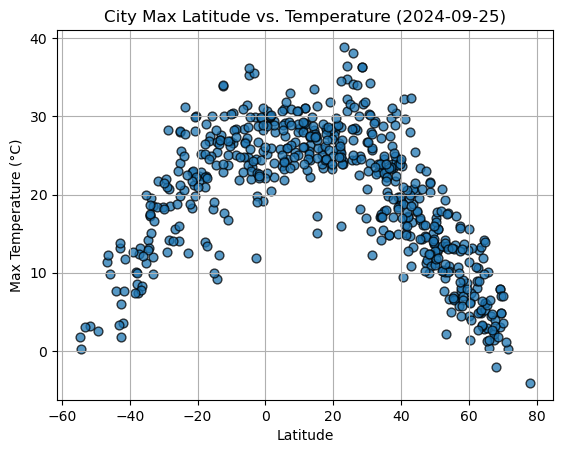

In [16]:
# Get Current Date (YYYY-MM-DD)
current_date = time.strftime("%Y-%m-%d")

# Convert Max Temp from Kelvin to Celsius if not already converted
if city_data_df["Max Temp"].max() > 200:  # Assuming temperatures are still in Kelvin
    city_data_df["Max Temp"] = city_data_df["Max Temp"] - 273.15

# Build scatter plot for latitude vs. temperature
city_data_df.plot(
    kind="scatter", x="Lat", y="Max Temp", edgecolors="black", s=40, alpha=0.75
)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title(f"City Max Latitude vs. Temperature ({current_date})")
plt.yticks([0, 10, 20, 30, 40])
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

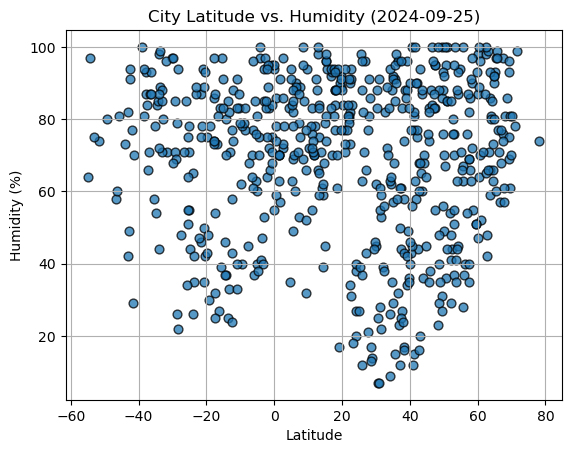

In [17]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(
    kind="scatter", x="Lat", y="Humidity", edgecolors="black", s=40, alpha=0.75
)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({current_date})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

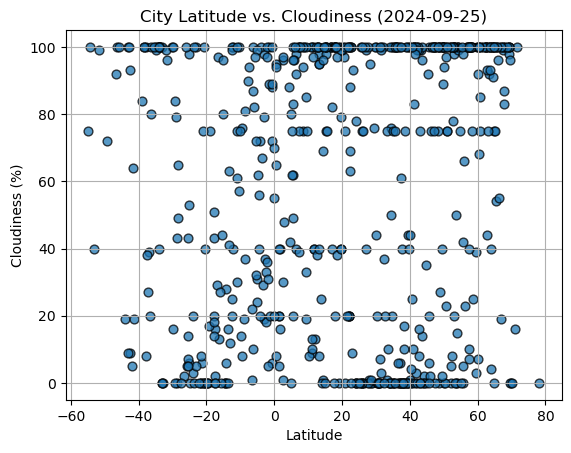

In [18]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(
    kind="scatter", x="Lat", y="Cloudiness", edgecolors="black", s=40, alpha=0.75
)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({current_date})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

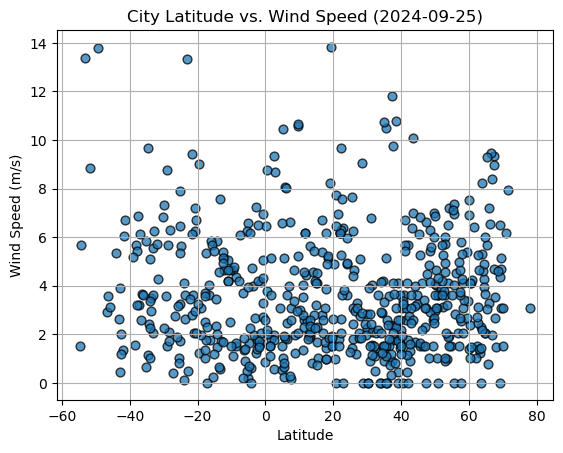

In [19]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(
    kind="scatter", x="Lat", y="Wind Speed", edgecolors="black", s=40, alpha=0.75
)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({current_date})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(dataframe, x_column, y_column):

    # Perform linear regression
    x_values = dataframe[x_column]
    y_values = dataframe[y_column]

    # Get the slope, intercept, and other regression values
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

   
    dataframe.plot(
        kind="scatter", x=x_column, y=y_column, edgecolors="black", s=40, alpha=0.75
    )

    # Calculate the regression line
    regress_values = slope * x_values + intercept

    # Plot the regression line
    plt.plot(
        x_values,
        regress_values,
        color="red",
        label=f"y = {round(slope, 2)}x + {round(intercept, 2)}",
    )

    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f"{x_column} vs. {y_column} ({current_date})")

    if x_column == "Lat":
        plt.xlabel("Latitude")
        plt.title(f"Latitude vs. {y_column} ({current_date})")

    plt.grid(True)

    plt.legend()

    print(f"The r^2 value is: {r_value ** 2}")
    plt.show()



In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,saint peter,13.2500,-59.6167,26.31,75,98,5.62,BB,1727245668
2,crane,31.3974,-102.3501,25.74,53,3,4.03,US,1727245669
4,kantabanji,20.4833,82.9167,28.15,77,97,1.00,IN,1727245672
6,stanley,54.8680,-1.6985,5.01,94,75,1.54,GB,1727245616
7,dongola,19.1667,30.4833,31.84,17,0,8.21,SD,1727245675


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,11.35,58,92,2.92,NZ,1727245597
3,sao joao da barra,-21.6403,-41.0511,22.93,87,0,9.43,BR,1727245539
5,acarau,-2.8856,-40.1200,24.59,85,19,7.24,BR,1727245673
9,blackmans bay,-43.0167,147.3167,13.18,42,100,0.45,AU,1727245542
15,port mathurin,-19.6833,63.4167,22.35,75,0,9.02,MU,1727245620


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.6998491086346667


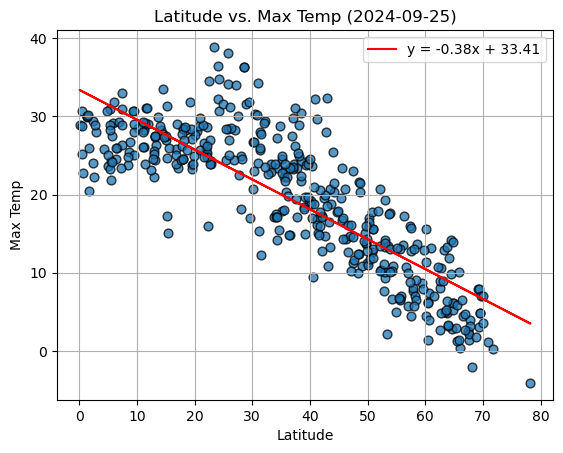

In [54]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df, "Lat", "Max Temp")

The r^2 value is: 0.5816736426789991


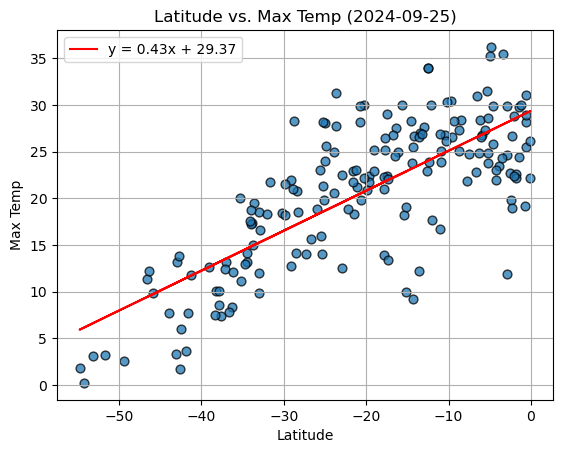

In [55]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df, "Lat", "Max Temp")

**Discussion about the linear relationship:** Both graphs compare latitude versus maximum temperature. The regression line in the first graph has a negative slope, indicating that as latitude increases, the maximum temperatures decrease. This trend is logical, as moving further north typically results in colder maximum temperatures. In contrast, the regression line in the second graph has a positive slope, which makes sense because as you move north towards the equator, the maximum temperature should increase. Both graphs exhibit a similar y-intercept, representing the maximum temperature at the equator (when latitude is 0).

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.00027743408227030685


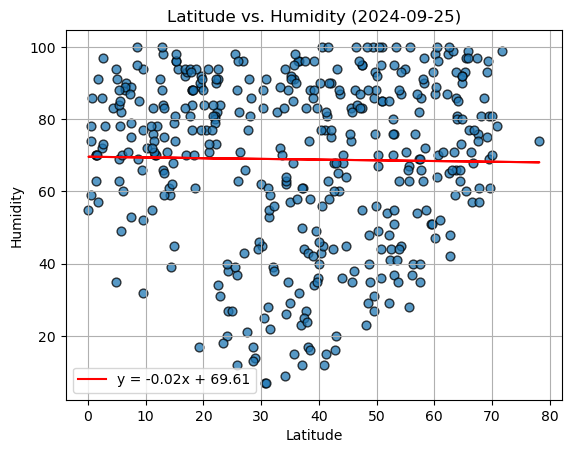

In [25]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df, "Lat", "Humidity")

The r^2 value is: 0.003277727909575582


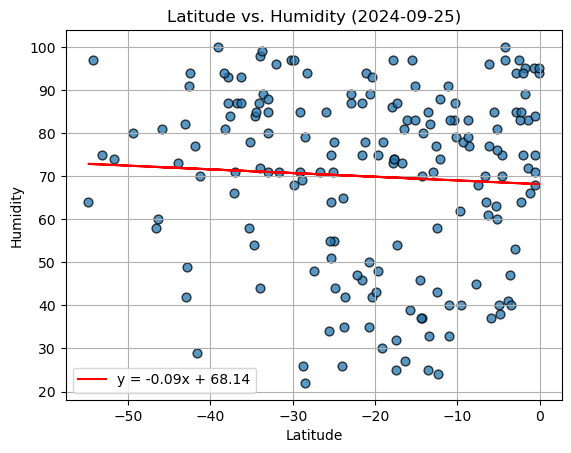

In [26]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df, "Lat", "Humidity")

**Discussion about the linear relationship:** Both graphs compare latitude against humidity. In the first, the regression line has a slight negative slope, indicating a weak relationship where humidity decreases slightly as latitude increases. This suggests that other factors may influence humidity levels. In the second graph, the negative slope is more pronounced, showing a stronger correlation between increasing latitude and decreasing humidity. Regions farther from the equator tend to have lower humidity, especially in cooler climates. Both graphs show similar y-intercepts, representing typical humidity levels near the equator, but the second graph highlights a clearer trend.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.007695473342164933


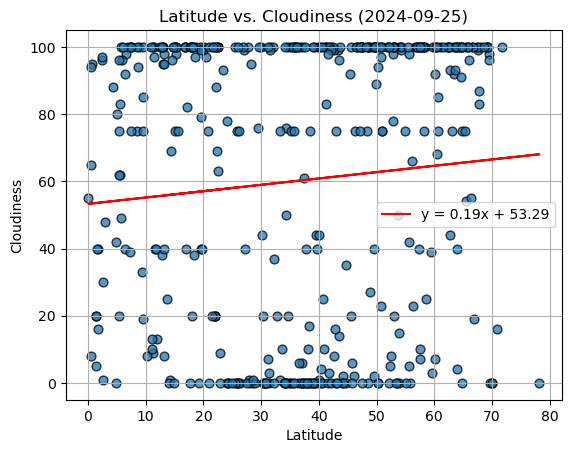

In [27]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df, "Lat", "Cloudiness")

The r^2 value is: 0.012919074665371589


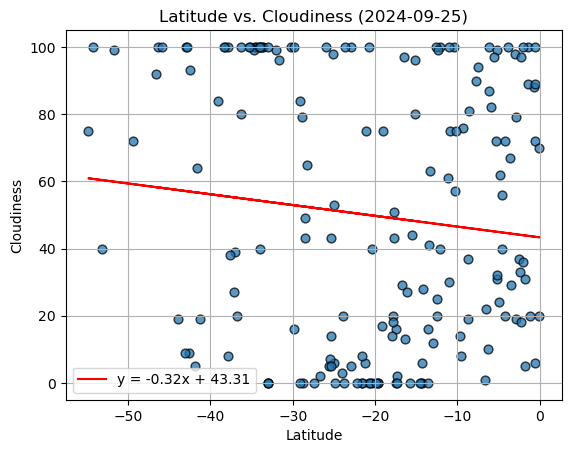

In [28]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df, "Lat", "Cloudiness")

**Discussion about the linear relationship:** Both graphs compare latitude against cloudiness. In the first graph, representing the Northern Hemisphere, the regression line has a positive slope, suggesting that cloudiness increases as latitude rises, possibly due to more frequent overcast conditions in cooler northern regions. The second graph, representing the Southern Hemisphere, has a negative slope, indicating that cloudiness decreases as latitude increases, implying clearer skies further south. The y-intercepts show slightly different initial cloudiness levels between the two hemispheres, but overall, the patterns suggest contrasting cloudiness trends in northern and southern latitudes.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.003162688905333677


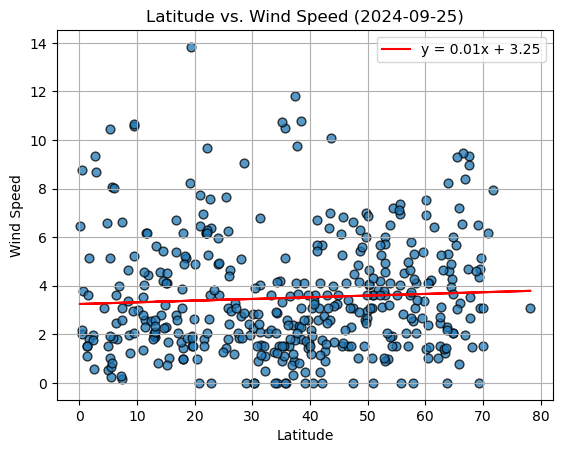

In [29]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df, "Lat", "Wind Speed")

The r^2 value is: 0.05835126295388509


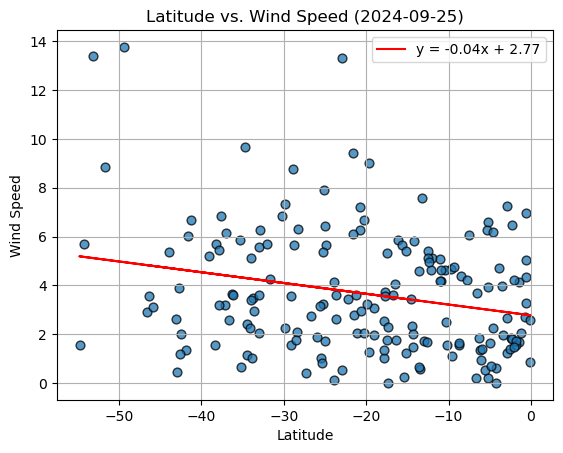

In [30]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df, "Lat", "Wind Speed")

**Discussion about the linear relationship:** Both graphs compare latitude against windspeed. In the first graph, representing the Northern Hemisphere, the regression line has a slight positive slope, indicating that windspeed increases gradually as latitude rises. This suggests that regions further north may experience stronger winds, possibly due to weather systems or geographic factors. In the second graph, for the Southern Hemisphere, the regression line has a negative slope, showing that windspeed decreases as latitude increases, meaning winds may be lighter further south. The y-intercepts in both graphs differ slightly, but overall, the trends highlight contrasting windspeed patterns across hemispheres.